Chapter 10, 聊聊可视化
# 使用Matplotlib绘制线图
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

## 导入包

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 绘制正弦

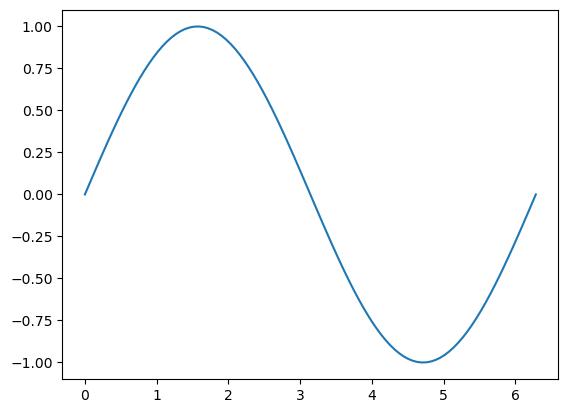

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
plt.show()

## 修改颜色、线宽

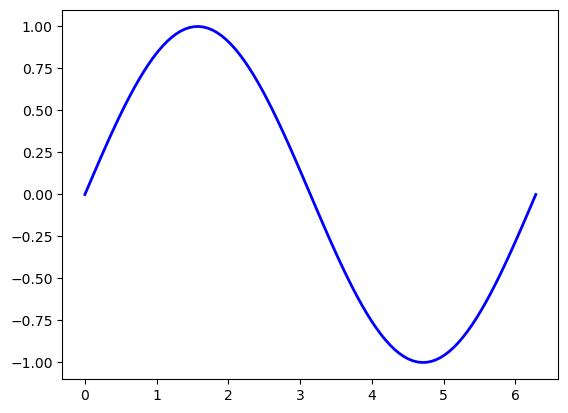

In [3]:

# 创建画布和坐标轴对象
fig, ax = plt.subplots()

# 绘制曲线
ax.plot(x, y, color='blue', linewidth=2)

# 显示图像
plt.show()


## 增加marker

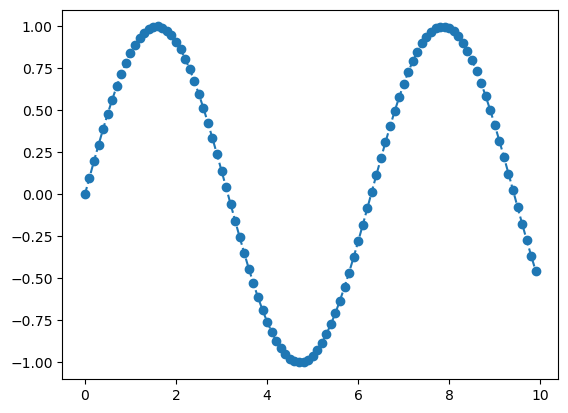

In [4]:
# 生成数据
x = np.arange(0, 10, 0.1)
y = np.sin(x)

# 创建画布和坐标轴对象
fig, ax = plt.subplots()

# 绘制曲线
ax.plot(x, y, linestyle='--', marker='o')

# 显示图像
plt.show()

## 两条曲线

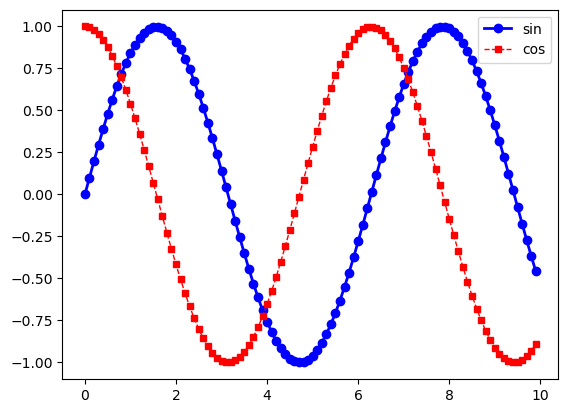

In [5]:

y1 = np.sin(x)
y2 = np.cos(x)

# 创建画布和坐标轴对象
fig, ax = plt.subplots()

# 绘制曲线
ax.plot(x, y1, color='blue', linewidth=2, linestyle='-', marker='o', markersize=6, label='sin')
ax.plot(x, y2, color='red', linewidth=1, linestyle='--', marker='s', markersize=4, label='cos')

# 设置图例
ax.legend()

# 显示图像
plt.show()


## 美化

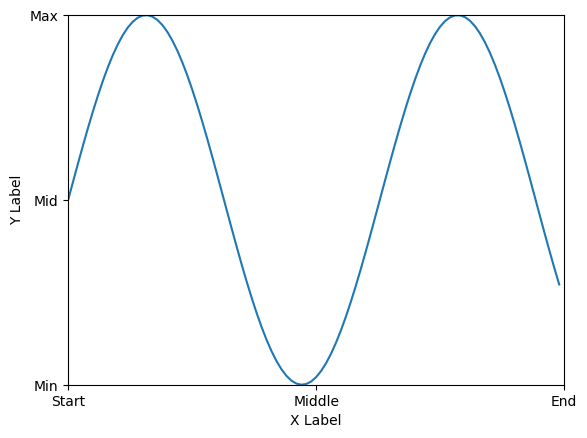

In [6]:
# 创建画布和坐标轴对象
fig, ax = plt.subplots()

# 绘制曲线
ax.plot(x, y)

# 设置坐标轴范围
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

# 设置坐标轴标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# 设置坐标轴刻度
ax.set_xticks([0, 5, 10])
ax.set_yticks([-1, 0, 1])

# 设置坐标轴刻度标签
ax.set_xticklabels(['Start', 'Middle', 'End'])
ax.set_yticklabels(['Min', 'Mid', 'Max'])

# 显示图像
plt.show()

## 增加网格

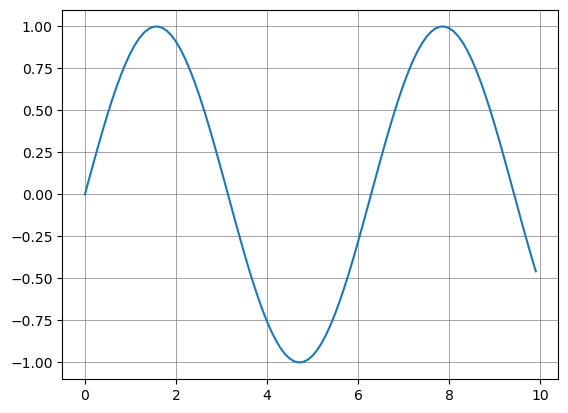

In [7]:

# 创建画布和坐标轴对象
fig, ax = plt.subplots()

# 绘制曲线
ax.plot(x, y)

# 设置网格线的颜色和线宽
ax.grid(True, color='gray', linewidth=0.5)

# 显示图像
plt.show()


## 子图

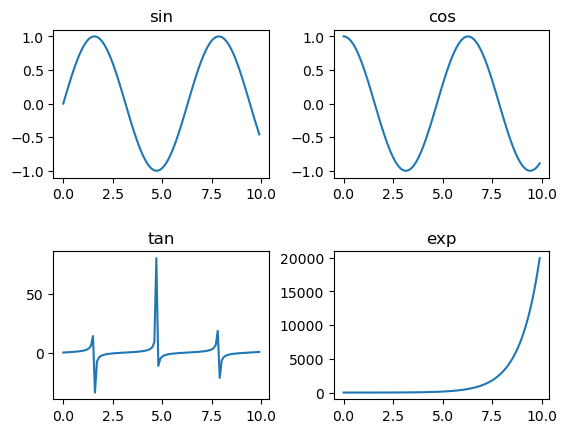

In [8]:
# 生成数据
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)

# 创建画布和子图对象
fig, axs = plt.subplots(2, 2)

# 绘制第一个子图
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('sin')

# 绘制第二个子图
axs[0, 1].plot(x, y2)
axs[0, 1].set_title('cos')

# 绘制第三个子图
axs[1, 0].plot(x, y3)
axs[1, 0].set_title('tan')

# 绘制第四个子图
axs[1, 1].plot(x, y4)
axs[1, 1].set_title('exp')

# 调整子图间距
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# 显示图像
plt.show()


Text(0.5, 1.0, 'tan')

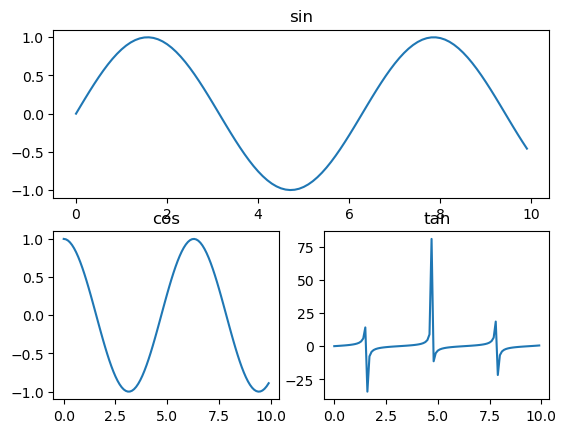

In [9]:

import matplotlib.gridspec as gridspec

# 生成数据
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# 创建画布和gridspec对象
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

# 绘制第一个子图
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(x, y1)
ax1.set_title('sin')

# 绘制第二个子图
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(x, y2)
ax2.set_title('cos')

# 绘制第三个子图
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(x, y3)
ax3.set_title('tan')


## 用色谱渲染

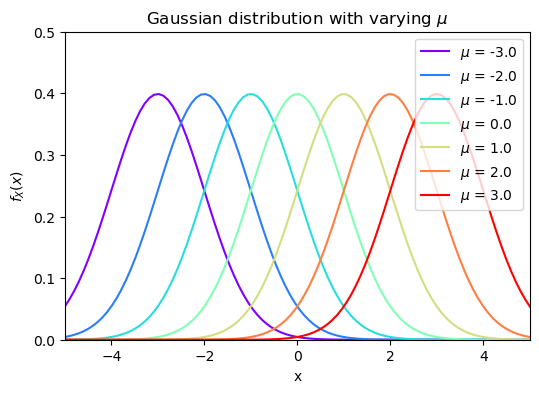

In [14]:
from scipy.stats import norm
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

# 导入SciPy库中的norm模块。
# norm模块提供了正态分布（也称为高斯分布）相关的功能。
# norm.pdf(x, loc, scale): 计算给定正态分布的概率密度函数（Probability Density Function，PDF）在指定x值处的取值。
# loc参数表示分布的均值（平均值），scale参数表示分布的标准差。

# 生成自变量 x 的取值范围
x = np.linspace(-5, 5, 100)

# mu 的取值范围和渐变色彩映射
mu_range = np.linspace(-3, 3, 7)
colors = plt.cm.rainbow(np.linspace(0, 1, len(mu_range)))
# plt.cm.rainbow函数来生成一个彩虹色调的颜色映射。
# 它的作用是为一个由mu_range数组中的值组成的序列创建一组颜色值。
# 具体地说，np.linspace(0, 1, len(mu_range))创建了一个从0到1的等间隔的数组，
# 其长度与mu_range相同。这个数组表示了一系列归一化的数值，可以用来在颜色映射中对应不同的颜色。
# 然后，plt.cm.rainbow函数将这个归一化的数组作为输入，
# 并返回对应的彩虹色调的颜色值。
# 这些颜色值可以用于绘制图形或者为数据集中的不同元素进行着色，以表示它们在某种程度上的差异。

fig, ax = plt.subplots(figsize = (6,4))

# 绘制高斯分布曲线
for mu, color in zip(mu_range, colors):
    y = norm.pdf(x, mu, 1)
    plt.plot(x, y, color=color, label=r'$\mu$ = {}'.format(mu))

# 设置图例、标题和坐标轴标签
plt.legend()
plt.title('Gaussian distribution with varying $\mu$')
plt.xlabel('x')
plt.ylabel(r'$f_X(x)$')
plt.xlim(-5,5)
plt.ylim(0,0.5)

# 显示图像
plt.show()

fig.savefig('Figures\Matplotlib绘制高斯PDF，mu变化.svg', format='svg')

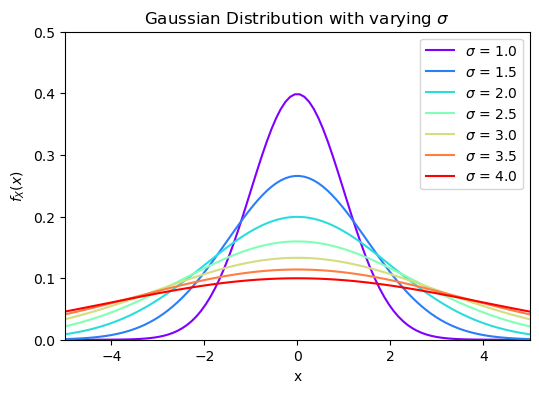

In [13]:
# 生成自变量 x 的取值范围
x = np.linspace(-5, 5, 100)

# sigma 的取值范围和渐变色彩映射
sigma_range = np.linspace(1, 4, 7)
colors = plt.cm.rainbow(np.linspace(0, 1, len(sigma_range)))

fig, ax = plt.subplots(figsize = (6,4))

# 绘制高斯分布曲线
for sigma, color in zip(sigma_range, colors):
    y = norm.pdf(x, 0, sigma)
    plt.plot(x, y, color=color, label=r'$\sigma$ = {}'.format(sigma))

# 设置图例、标题和坐标轴标签
plt.legend()
plt.title('Gaussian Distribution with varying $\sigma$')
plt.xlabel('x')
plt.ylabel(r'$f_X(x)$')
plt.xlim(-5,5)
plt.ylim(0,0.5)

# 显示图像
plt.show()
fig.savefig('Figures\Matplotlib绘制高斯PDF，sigma变化.svg', format='svg')

In [12]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023